In [94]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style()

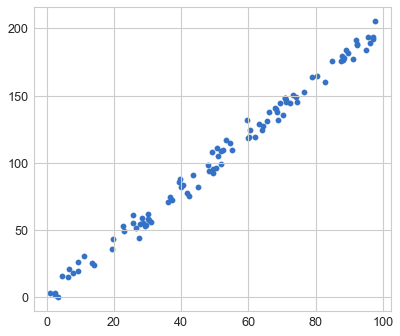

In [95]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

In [96]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) ** 2
    return total_cost / (2 * len(X))
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i])
    return total_cost / (len(X))    
def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) * X[i]
    return total_cost / (len(X))  

In [97]:
#Momentum
EPOCHS = 50
LEARNING_RATE = 0.0001
theta0 = 1
theta1 = 1
prev_upd_theta0 = 0
prev_upd_theta1 = 0
gamma = 0.9
for _ in range (EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    cur_upd_theta0 = gamma * prev_upd_theta0 + LEARNING_RATE * dt0
    theta0 = theta0 - cur_upd_theta0
    cur_upd_theta1 = gamma * prev_upd_theta1 + LEARNING_RATE * dt1
    theta1 = theta1 - cur_upd_theta1
    
    print("theta0:", theta0, "theta1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))
    #переходя на соеующий шаг записываем текушее значение апдейта как предыдущее для следующего шага
    prev_upd_theta0 = cur_upd_theta0
    prev_upd_theta1 = cur_upd_theta1

theta0: 1.0052122347350354 theta1: 1.3477691239394252 cost: 757.286358189065
theta0: 1.0133057722707963 theta1: 1.8879960621613325 cost: 35.29913043392401
theta0: 1.021181269131899 theta1: 2.414196091819983 cost: 304.73717714537315
theta0: 1.026122309693906 theta1: 2.7453946334558994 cost: 966.5443430308094
theta0: 1.026698862810249 theta1: 2.7863008078017835 cost: 1074.6664669796828
theta0: 1.0231345147998325 theta1: 2.551766241690197 cost: 533.4574601819309
theta0: 1.0170638232393014 theta1: 2.1506233400894637 cost: 49.78952788589225
theta0: 1.0108248813403016 theta1: 1.7385666240978188 cost: 133.785525865385
theta0: 1.0065787663759758 theta1: 1.4595038403841034 cost: 524.9783267901664
theta0: 1.0055783788937287 theta1: 1.3968571768738112 cost: 649.9046111426188
theta0: 1.007825150746301 theta1: 1.5506982459363885 cost: 367.4474773476206
theta0: 1.012193819271508 theta1: 1.8460583197186136 cost: 55.128671442939975
theta0: 1.0169352164796515 theta1: 2.1664160205786906 cost: 58.2792502

In [98]:
#NAG
EPOCHS = 50
LEARNING_RATE = 0.0001
theta0 = 1
theta1 = 1
prev_upd_theta0 = 0
prev_upd_theta1 = 0
gamma = 0.9
for _ in range (EPOCHS):
    ahead_theta0 = theta0 - gamma * prev_upd_theta0
    ahead_theta1 = theta1 - gamma * prev_upd_theta1
    dt0 = der_theta0(X, Y, ahead_theta0, ahead_theta1)
    dt1 = der_theta1(X, Y, ahead_theta0, ahead_theta1)
     
    cur_upd_theta0 = gamma * prev_upd_theta0 + LEARNING_RATE * dt0
    theta0 = theta0 - cur_upd_theta0
    cur_upd_theta1 = gamma * prev_upd_theta1 + LEARNING_RATE * dt1
    theta1 = theta1 - cur_upd_theta1
    
    print("theta0:", theta0, "theta1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))
    #переходя на соеующий шаг записываем текушее значение апдейта как предыдущее для следующего шага
    prev_upd_theta0 = cur_upd_theta0
    prev_upd_theta1 = cur_upd_theta1

theta0: 1.0052122347350354 theta1: 1.3477691239394252 cost: 757.286358189065
theta0: 1.0116770346560706 theta1: 1.779515104624632 cost: 99.0949233533896
theta0: 1.0166291440133182 theta1: 2.1110048921080913 cost: 32.289998942253135
theta0: 1.0189643783650757 theta1: 2.2686454453007663 cost: 134.17380386213185
theta0: 1.0189383080825738 theta1: 2.269414205606047 cost: 134.88122002080877
theta0: 1.0175177592713902 theta1: 2.177665768842487 cost: 64.85994542563297
theta0: 1.0157529161505119 theta1: 2.0633107523784697 cost: 18.439632601415518
theta0: 1.0143791656350436 theta1: 1.9752965276961014 cost: 13.585756441233741
theta0: 1.013692045378198 theta1: 1.9332778604765075 cost: 20.739490691261835
theta0: 1.0136261385405398 theta1: 1.9328713177769188 cost: 20.838814726254963
theta0: 1.0139265598252116 theta1: 1.9570766850115313 cost: 15.936434984108475
theta0: 1.0143154567509063 theta1: 1.9873664054408073 cost: 12.66269148750473
theta0: 1.0145978725628166 theta1: 2.0107362696299793 cost: 12

In [99]:
#RMSprop
EPOCHS = 600
LEARNING_RATE = 0.1
theta0 = 1
theta1 = 1
betta = 0.9
grsq_t0 = 0 #квадрат градиента
grsq_t1 = 0 #квадрат градиента
for _ in range (EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    grsq_t0 = betta * grsq_t0 + (1 - betta) * dt0 * dt0
    grsq_t1 = betta * grsq_t1 + (1 - betta) * dt1 * dt1
    
    theta0 = theta0 - (LEARNING_RATE / np.sqrt( grsq_t0)) * dt0
    theta1 = theta1 - (LEARNING_RATE / np.sqrt( grsq_t1)) * dt1
      
    print("theta0:", theta0, "theta1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))
    

theta0: 1.316227766016838 theta1: 1.316227766016838 cost: 819.6385880117799
theta0: 1.5001533363667958 theta1: 1.500488742151493 cost: 437.87793733396825
theta0: 1.628399005688524 theta1: 1.6292795119085788 cost: 243.01695048558386
theta0: 1.7229685514659616 theta1: 1.7245845594700289 cost: 136.94493958419181
theta0: 1.7939434149478495 theta1: 1.7964824197550724 cost: 78.38285396828417
theta0: 1.8471805652651654 theta1: 1.8508293330837515 cost: 46.362132702997584
theta0: 1.8866475459330354 theta1: 1.8915903823231182 cost: 29.264418788105804
theta0: 1.9153172769451599 theta1: 1.9217334285586904 cost: 20.43386821575263
theta0: 1.935552348748021 theta1: 1.9436138912372793 cost: 16.0541153958485
theta0: 1.9492797809339975 theta1: 1.9591506004441879 cost: 13.980424190911727
theta0: 1.9580757177541768 theta1: 1.9699117055315831 cost: 13.048063893318378
theta0: 1.963213467414201 theta1: 1.9771637314960344 cost: 12.65191987598645
theta0: 1.9656993416535387 theta1: 1.981908089552768 cost: 12.49

theta0: 0.9867420061067684 theta1: 2.054961657199037 cost: 16.74652708850829
theta0: 0.8838288030623617 theta1: 1.9546538995325846 cost: 16.66210967307984
theta0: 0.9806532197393957 theta1: 2.0541626542167393 cost: 16.58958277250016
theta0: 0.8793260180418832 theta1: 1.9554116908996841 cost: 16.541376807313227
theta0: 0.9751297954857209 theta1: 2.0538684234640714 cost: 16.523690659908308
theta0: 0.87422846049834 theta1: 1.9555140881109139 cost: 16.536580723461515
theta0: 0.9703325029428025 theta1: 2.0542370874750606 cost: 16.574715235874784
theta0: 0.8686516359636823 theta1: 1.9550674089868694 cost: 16.628614724541436
theta0: 0.9659496769196179 theta1: 2.0549432135298304 cost: 16.686393231172744
theta0: 0.8630772807099428 theta1: 1.954539233859395 cost: 16.73605281666676
theta0: 0.961480499089834 theta1: 2.0554736616665843 cost: 16.76798998185222
theta0: 0.8579662441280893 theta1: 1.9543832409778754 cost: 16.77708694928728
theta0: 0.9566220063194885 theta1: 2.0555242449132805 cost: 16.

theta0: 0.7276054317869823 theta1: 2.058453696086489 cost: 16.661351997372766
theta0: 0.6269757413662487 theta1: 1.9584632675423284 cost: 16.661345789772597
theta0: 0.7263453449730304 theta1: 2.0584727487922643 cost: 16.661339461135398
theta0: 0.6257251840687432 theta1: 1.958482072098764 cost: 16.661332117096265
theta0: 0.7251045902455975 theta1: 2.0584914845621607 cost: 16.661323125734764
theta0: 0.6244938752801449 theta1: 1.9585006250037331 cost: 16.66131234360187
theta0: 0.7238828534978985 theta1: 2.0585098910794986 cost: 16.661299971548726
theta0: 0.6232815189443648 theta1: 1.958518929858514 cost: 16.66128660028961
theta0: 0.7226798583601679 theta1: 2.058527989322664 cost: 16.661272934875612
theta0: 0.622087796893886 theta1: 1.9585369636547485 cost: 16.66125975695236
theta0: 0.7214953480515887 theta1: 2.0585458153001692 cost: 16.661247647742005
theta0: 0.6209123937284875 theta1: 1.9585547015377855 cost: 16.66123700133309
theta0: 0.7203290597951733 theta1: 2.05856339438586 cost: 16.

theta0: 0.6630179676549832 theta1: 2.059427427891278 cost: 16.660657806354177
theta0: 0.5628835896825534 theta1: 1.9594294553566016 cost: 16.660657296786002
theta0: 0.6627499976329869 theta1: 2.059431467659076 cost: 16.660656794924197
theta0: 0.56261768210909 theta1: 1.9594334639825493 cost: 16.660656300999182
theta0: 0.6624861442335509 theta1: 2.0594354453678063 cost: 16.660655814547532
theta0: 0.5623558595303687 theta1: 1.9594374110254162 cost: 16.660655335766098
theta0: 0.6622263442164356 theta1: 2.059439361970359 cost: 16.660654864195735
theta0: 0.5620980591915088 theta1: 1.9594412974320552 cost: 16.66065440001621
theta0: 0.6619705353124243 theta1: 2.059443218404537 cost: 16.660653942790383
theta0: 0.5618442193017583 theta1: 1.9594451241348332 cost: 16.66065349269874
theta0: 0.6617186562091575 theta1: 2.0594470155940416 cost: 16.660653049337565
theta0: 0.5615942790190528 theta1: 1.959448892051226 cost: 16.660652612893973
theta0: 0.6614706465368224 theta1: 2.0594507544490748 cost: 1